In [1]:
## Data Analysis packages
import numpy as np
import pandas as pd

import warnings

## Data Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib

# sklearn library
import sklearn

### sklearn preprocessing tools
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer,FunctionTransformer,OneHotEncoder

# Error Metrics 
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


### Machine learning classification Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier


#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


#hyper parameter tunning
from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV


In [2]:
### Initial settings
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 10
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000' 
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            ) 

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

## Information about the dataset.

- employee_id : Unique Identity of each employee

- age : The actual age of the employee

- gender : male or female

- marital_status : Single or married Or divorced

- salary : The actual salary of the employee

- employment_type : Full time / Part time / Contract

- region : North / South and so on

- has_dependents : Yes or No

- tenure_years  : Number of years enrolled

- enrolled (target: 1 for enrolled, 0 for not enrolled)

## `Data-Import`

In [3]:
raw_data = pd.read_csv("https://github.com/neustackapp/assignment/raw/refs/heads/main/employee_data.csv")
raw_data.head()

,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
0,10001,60,Female,Single,55122.97,Part-time,West,No,1.5,0
1,10002,50,Female,Single,89549.66,Full-time,West,Yes,12.8,1
2,10003,36,Male,Divorced,74145.66,Part-time,Midwest,No,3.8,0
3,10004,64,Female,Married,53877.83,Full-time,Northeast,No,3.3,0
4,10005,29,Male,Single,63404.63,Contract,Midwest,Yes,10.0,0


## `Train-Test-Split:`

### Doing any kind of transformations before splitting the data leads to `deceitful model.`

In [4]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(raw_data,random_state=2)
print(f"Train data shape : ", train_df.shape)
print(f"Test data shape : ", test_df.shape)

Train data shape :  (7500, 10)
Test data shape :  (2500, 10)


In [5]:
train_df.head()

,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
2753,12754,56,Male,Married,69297.05,Full-time,South,Yes,0.5,1
2824,12825,51,Female,Single,76583.42,Part-time,South,Yes,1.6,1
2597,12598,45,Female,Married,94439.96,Full-time,West,Yes,1.3,1
3973,13974,22,Male,Divorced,61050.07,Part-time,Midwest,Yes,3.1,0
3335,13336,50,Female,Married,28380.67,Full-time,South,Yes,13.0,1


In [6]:
## Initial statistical description
train_df.describe() 

,employee_id,age,salary,tenure_years,enrolled
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,14998.246533,42.862800,65003.785275,4.004280,0.614800
std,2877.092961,12.264106,14972.851589,3.886657,0.486675
min,10001.000000,22.000000,2207.790000,0.000000,0.000000
25%,12518.500000,32.000000,54686.437500,1.200000,0.000000
50%,15004.500000,43.000000,64967.675000,2.800000,1.000000
75%,17470.250000,53.000000,75045.142500,5.600000,1.000000
max,19999.000000,64.000000,120312.000000,36.000000,1.000000


### `Observations:`

- Average salary of the employee is 65000, with a deviation of 15000(approx).

- Median of the tenure years is 3(approx), which means 50% of employees were enrolled for more than 3 years.


In [7]:
## General information about the features in train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 2753 to 7336
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      7500 non-null   int64  
 1   age              7500 non-null   int64  
 2   gender           7500 non-null   object 
 3   marital_status   7500 non-null   object 
 4   salary           7500 non-null   float64
 5   employment_type  7500 non-null   object 
 6   region           7500 non-null   object 
 7   has_dependents   7500 non-null   object 
 8   tenure_years     7500 non-null   float64
 9   enrolled         7500 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 644.5+ KB


## `Sanity Check`

In [8]:
# Concatenate the count of null values and the percentage of null values into a single DataFrame
nullsFrame = pd.concat([train_df.isnull().sum(), round(train_df.isnull().mean() * 100,2)],
                       axis=1,
                       keys=["Count", "Percentage"])

## print the nullsFrame
print(f"The Data Frame of Missing Values in the Data : \n {nullsFrame}")

The Data Frame of Missing Values in the Data : 
                  Count  Percentage
employee_id          0         0.0
age                  0         0.0
gender               0         0.0
marital_status       0         0.0
salary               0         0.0
employment_type      0         0.0
region               0         0.0
has_dependents       0         0.0
tenure_years         0         0.0
enrolled             0         0.0


In [ ]:
### Checking for the duplicate values in the dataset
train_df.duplicated().sum()

np.int64(0)

### No Duplicates and Missing values in the data.

## `Endogeneous Variable study`

The Enrolled column is the target variable.

In [10]:
train_df["enrolled"].value_counts()

enrolled
1    4611
0    2889
Name: count, dtype: int64

## `Exogeneous Varibales`

In [14]:
train_df.columns[:-1]

Index(['employee_id', 'age', 'gender', 'marital_status', 'salary',
       'employment_type', 'region', 'has_dependents', 'tenure_years'],
      dtype='object')

## `Exploratory Data Analysis and Visualization`

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

In [16]:
train_df.corr(numeric_only=True)

,employee_id,age,salary,tenure_years,enrolled
employee_id,1.000000,-0.013402,0.007438,0.003992,0.008361
age,-0.013402,1.000000,0.002858,0.001980,0.260633
salary,0.007438,0.002858,1.000000,-0.002667,0.370186
tenure_years,0.003992,0.001980,-0.002667,1.000000,-0.006686
enrolled,0.008361,0.260633,0.370186,-0.006686,1.000000


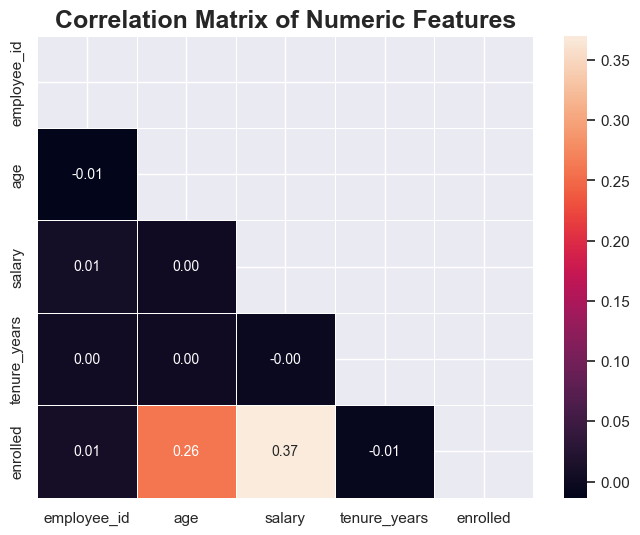

In [18]:
## correlation matrix
correlation_matrix = train_df.corr(numeric_only=True)

## mask
mask = np.triu(np.ones_like(train_df.corr(numeric_only=True)))


## heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f",
            annot_kws={'size': 10}, linewidths=0.5, cbar=True)

## title
plt.title("Correlation Matrix of Numeric Features", fontsize=18, weight="bold")

## Show the plot
plt.show()

### `Observations`:

The Salary and age relatively have the higher impact on the target variable than other variables.

## `Data distribution graphs`

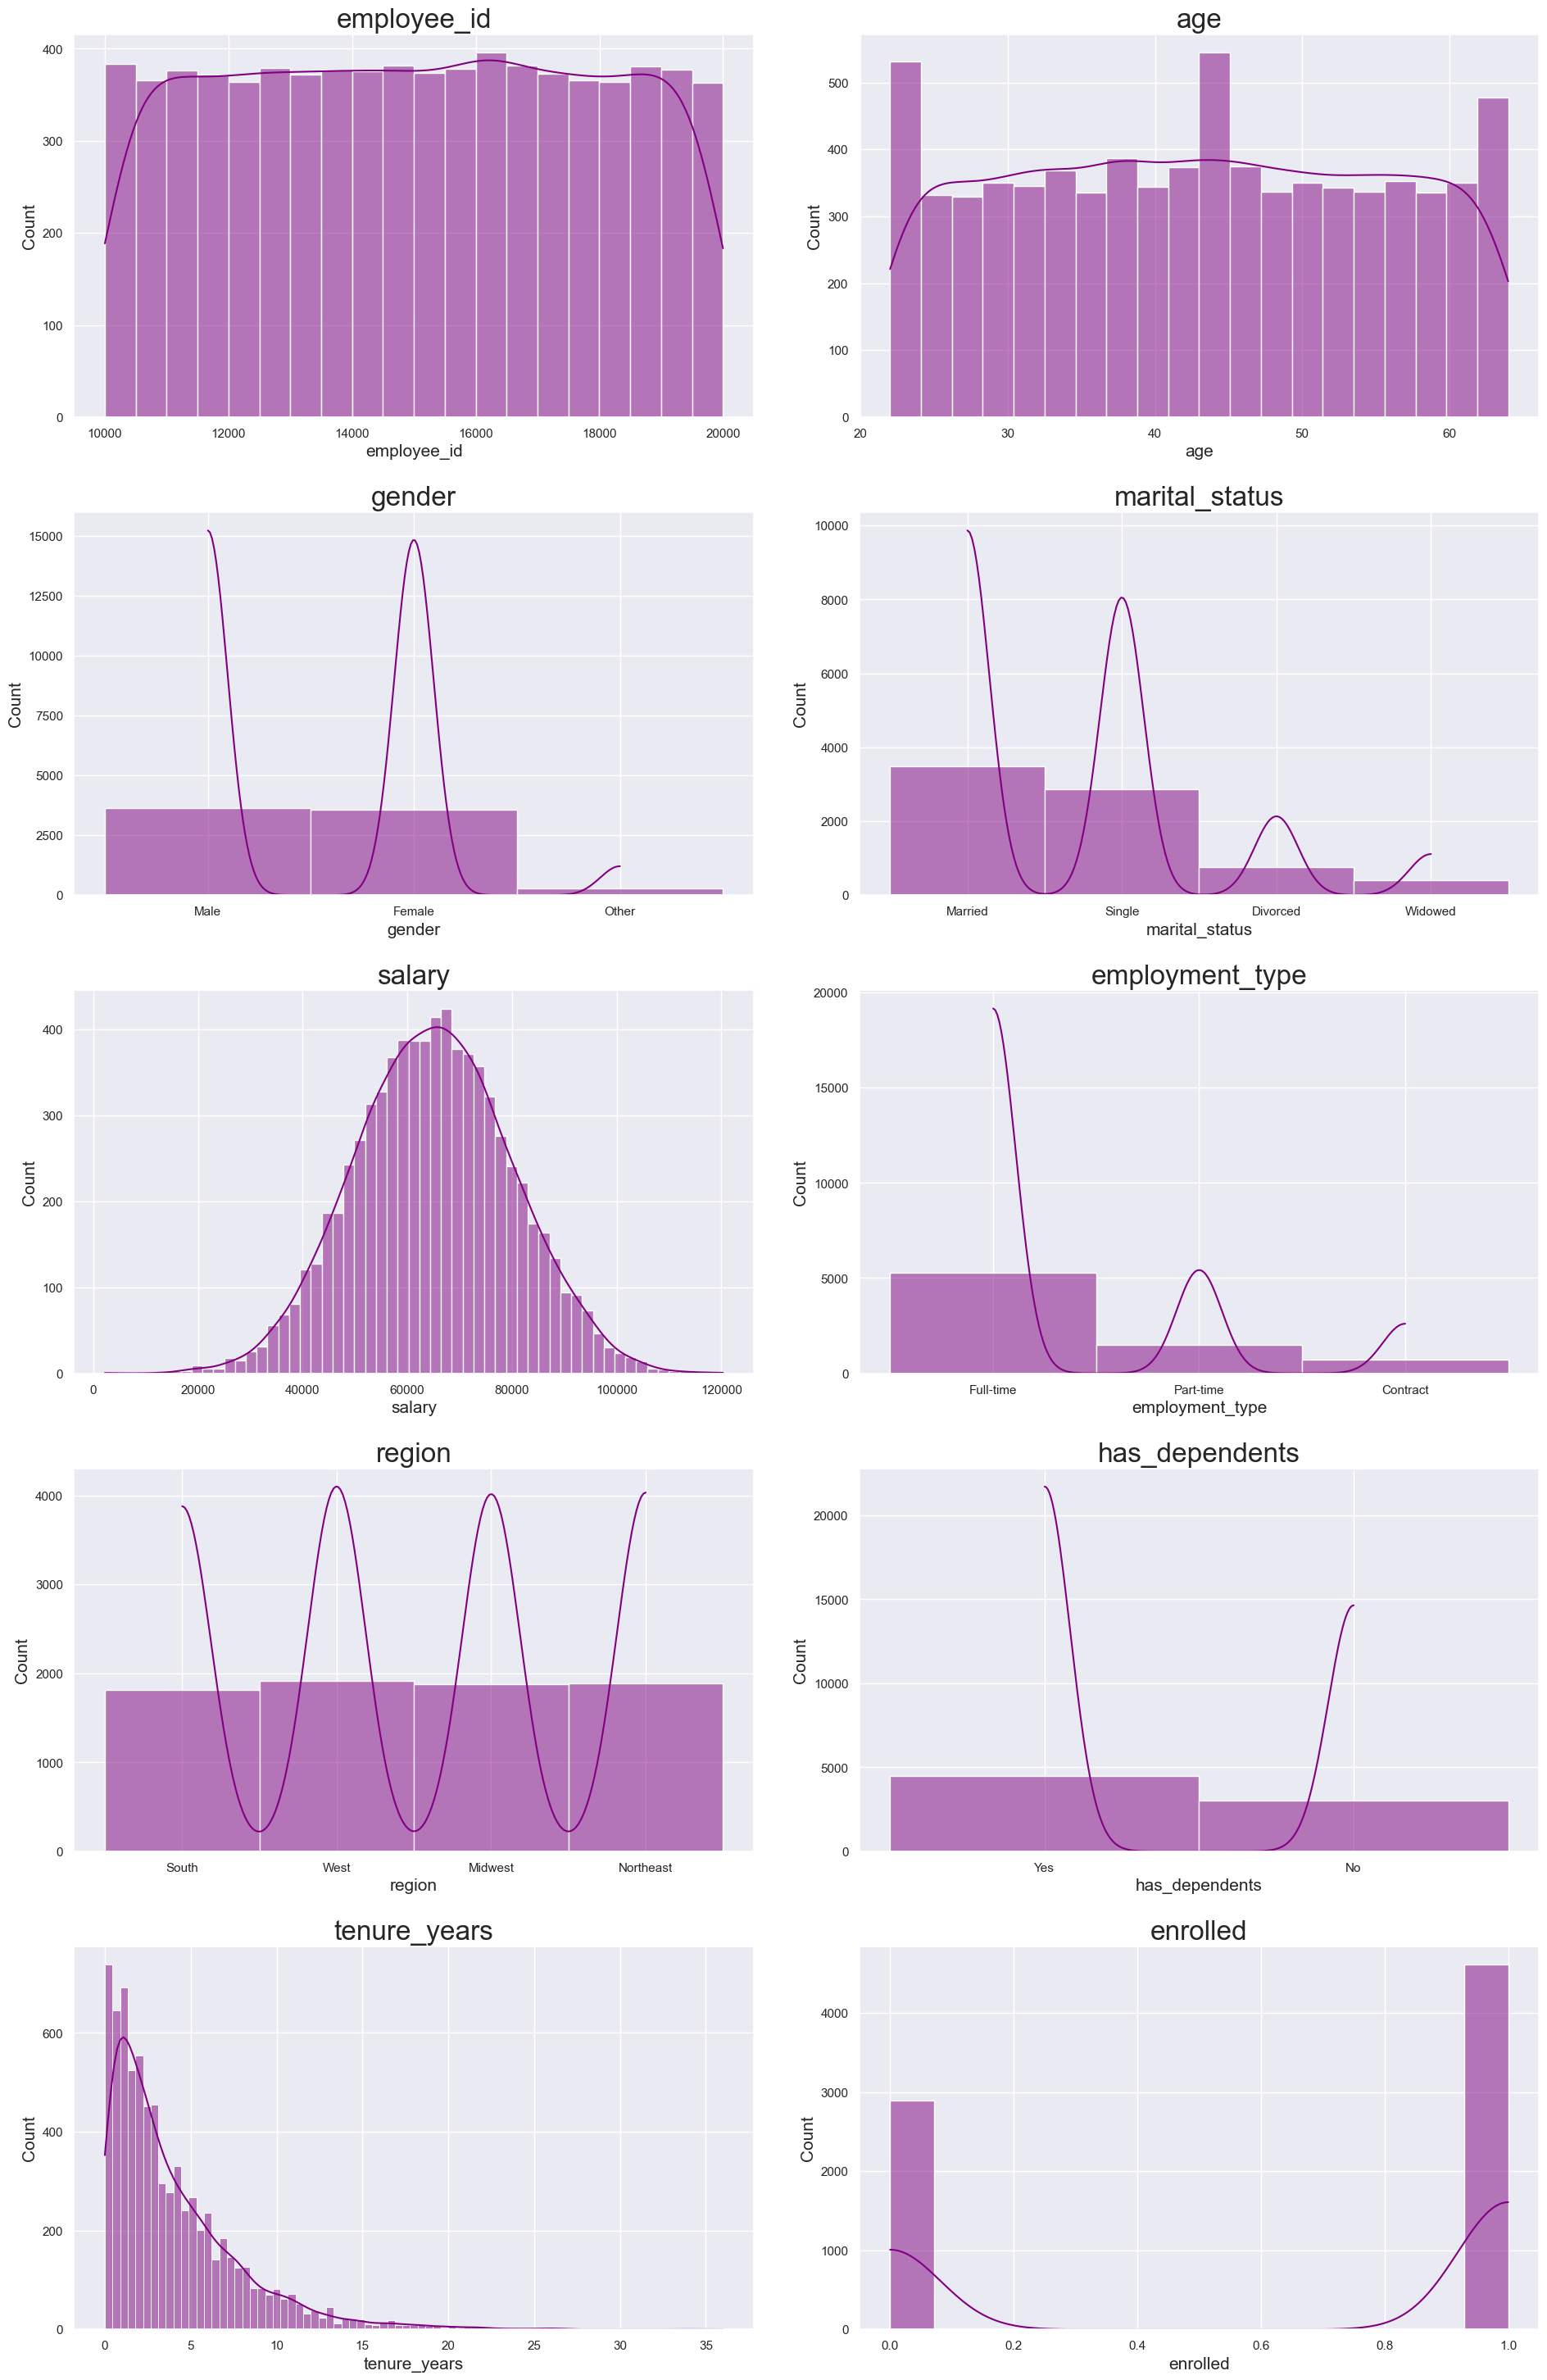

In [22]:
sns.set(rc={
            "font.size":15,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")
fig, axs = plt.subplots(5,2, figsize=(20,30))
fig.tight_layout(pad=4.0)

for f,ax in zip(train_df,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=train_df,x=train_df[f],kde=True,color='purple')
    ax.set_title(f)

## `Piechart percentage distribution features`

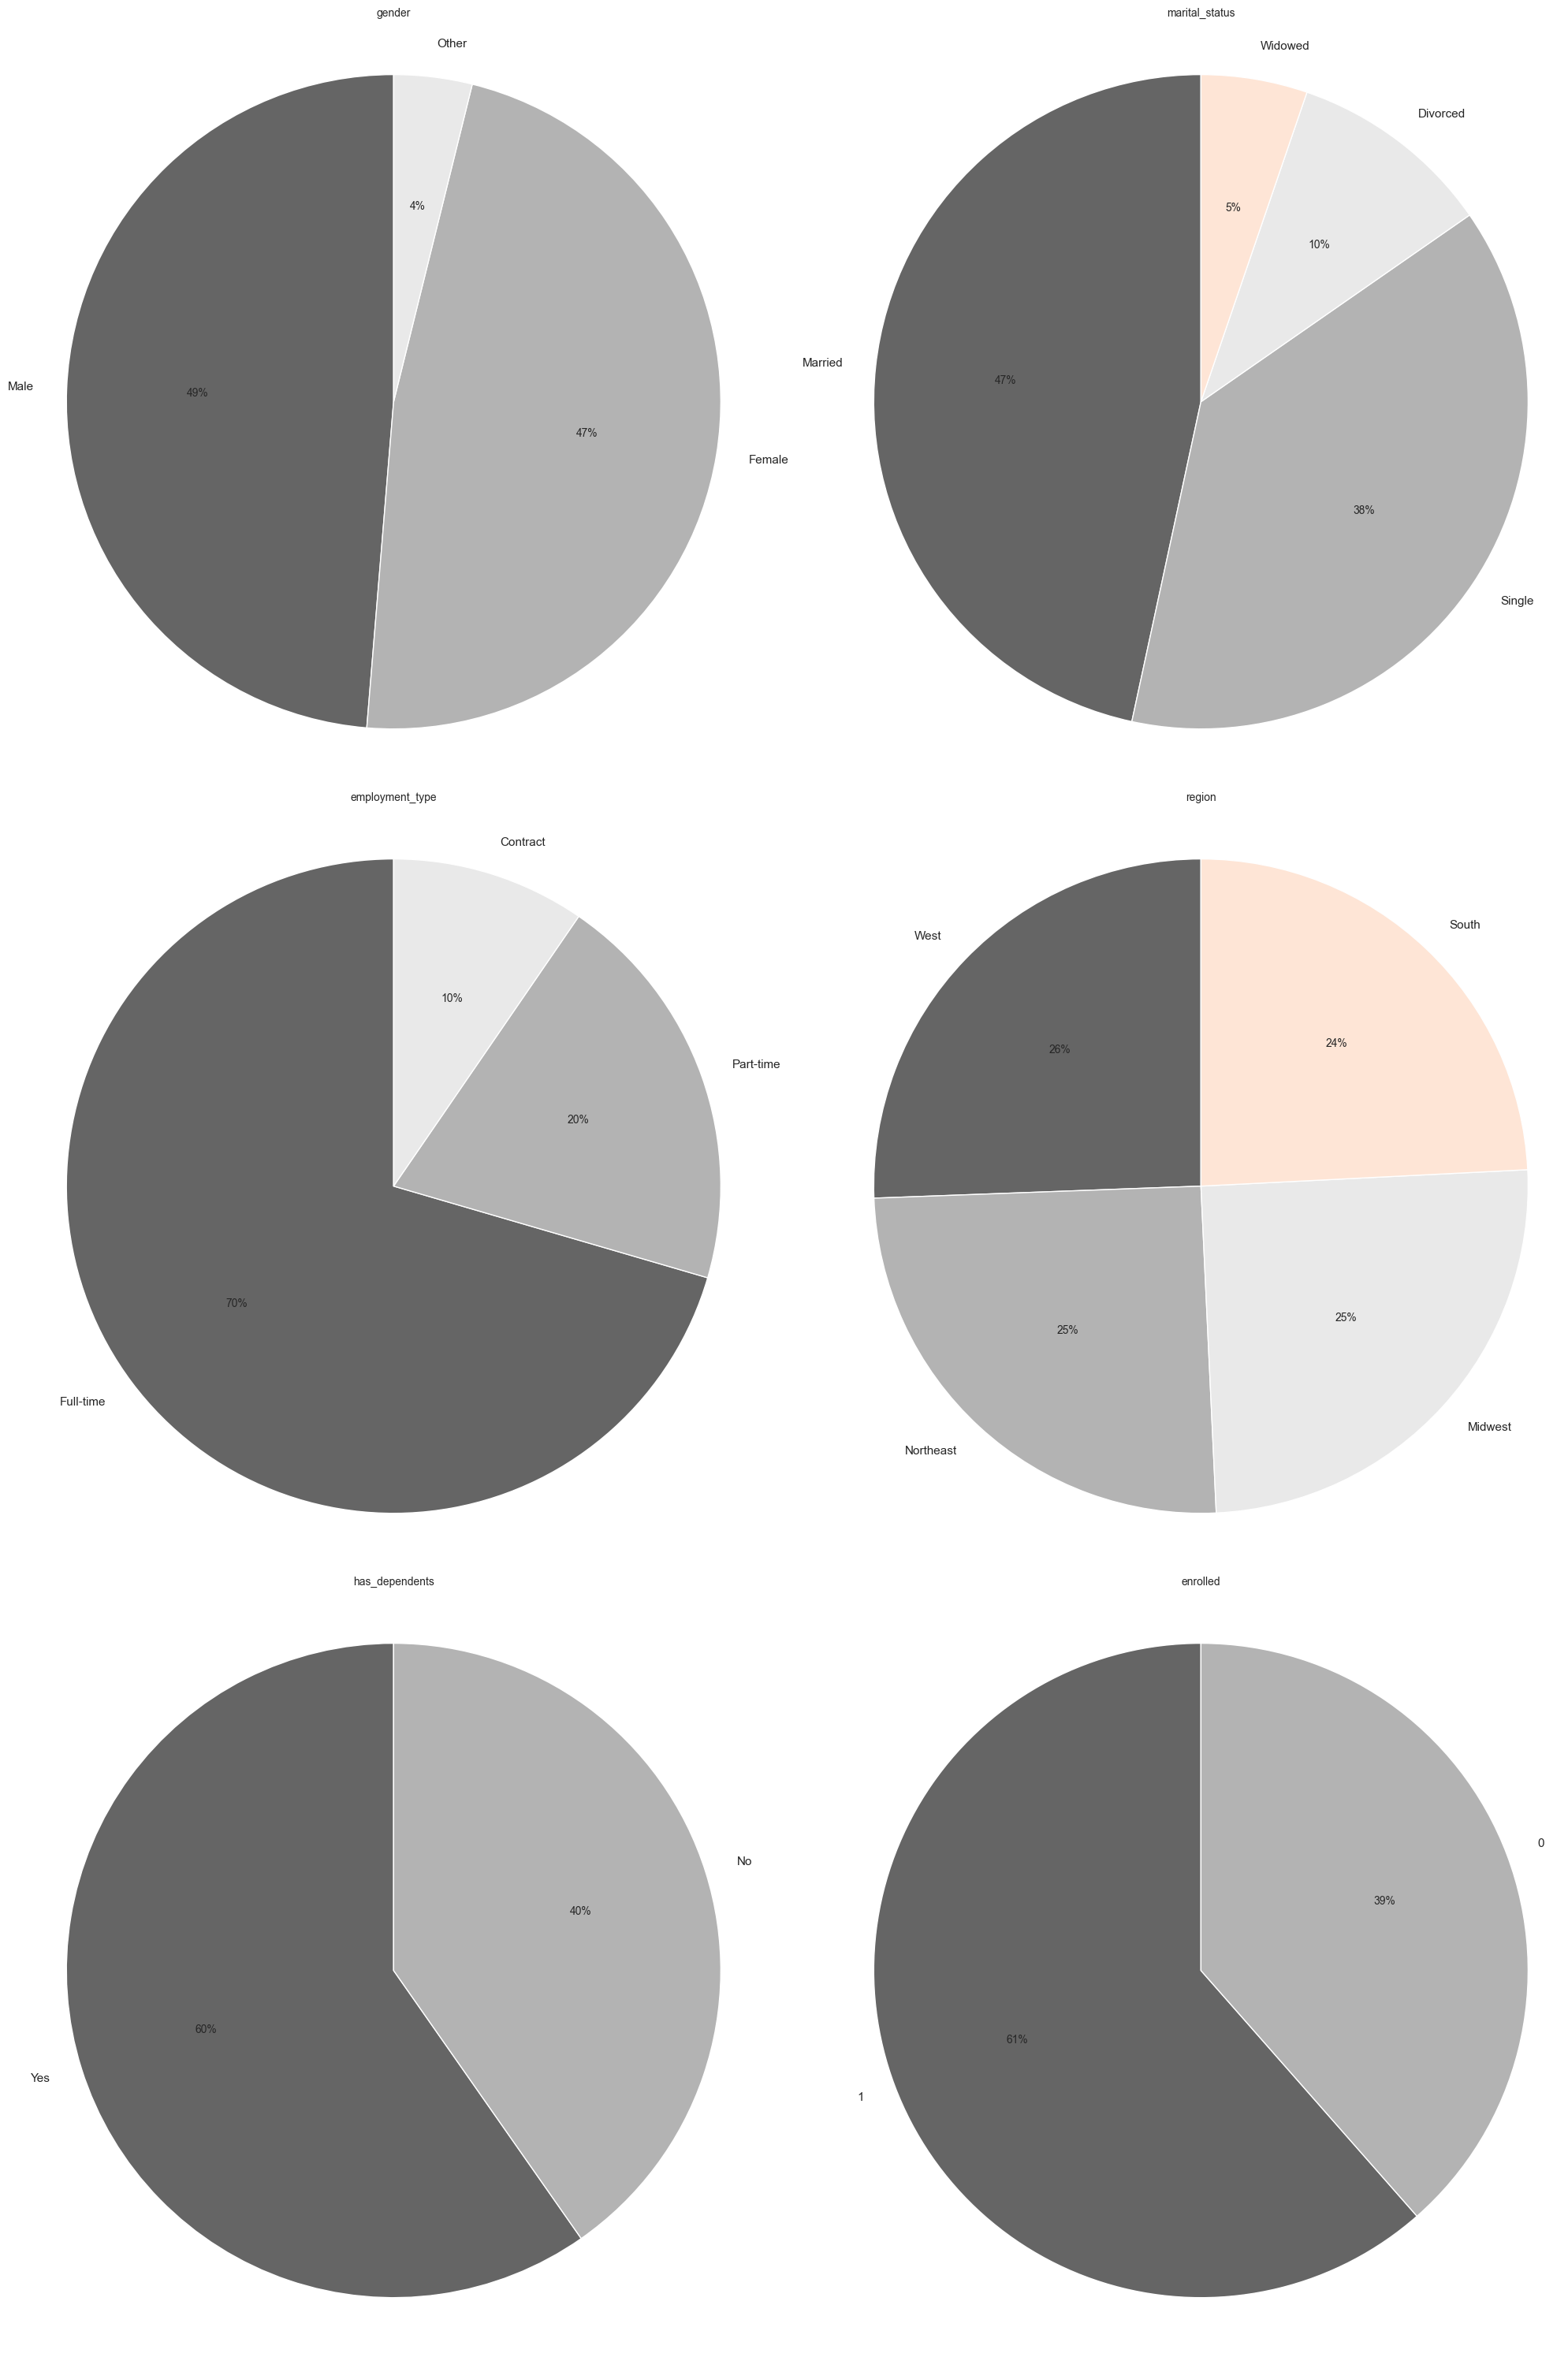

In [29]:

new_train_df = train_df.copy()
new_train_df.drop(['employee_id', 'age','tenure_years','salary'], axis=1, inplace=True)

sns.set(rc={"font.size":10, "axes.titlesize":10, "axes.labelsize":13}, style="darkgrid")

fig, axes = plt.subplots(3, 2, figsize=(20, 30))  # 5 rows, 2 columns

for i, col in enumerate(new_train_df):
    column_values = new_train_df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    
    axes[i//2, i%2].pie(sizes, labels=labels, colors=sns.color_palette("RdGy_r"), autopct='%1.0f%%', startangle=90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)

plt.tight_layout()
plt.show()


### `Observations`:

- The number of men and women in this sample is approximately the same

- Majority of the customers Married.

- The vast majority of our customers are Full-Time employees.

- Most of our customers have dependents.

- Customers are approximately same in the all the regions.


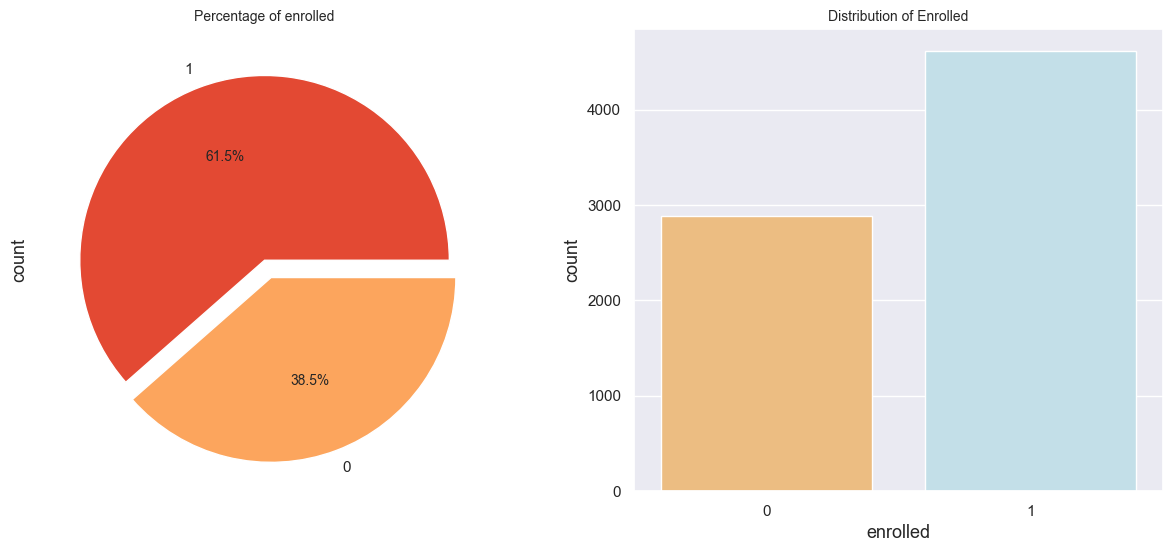

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
train_df['enrolled'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of enrolled')
sns.countplot(x='enrolled',data=train_df,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of Enrolled')
plt.show()

### `Observations`:

- As per the given data, 61.5% people are enrolled and 38.5% are not enrolled.

To analyse and visualise the data lets divide data columns into categorical and numerical columns.

In [32]:
# numerical and categoriacl columns(features)
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes('object').columns.tolist()

In [33]:
# numerical features
print("Total numeric columns are:", len(numeric_cols))
print(numeric_cols)

Total numeric columns are: 5
['employee_id', 'age', 'salary', 'tenure_years', 'enrolled']


In [34]:
# categorical features
print("Total categorical columns are:", len(categorical_cols))
print(categorical_cols)

Total categorical columns are: 5
['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']


In [36]:
numeric_cols.remove("enrolled")

## `Exploratory Data Analysis and Visualization on Numerical Columns`

### **Boxplot: To check the Outliers in the numerical columns.**

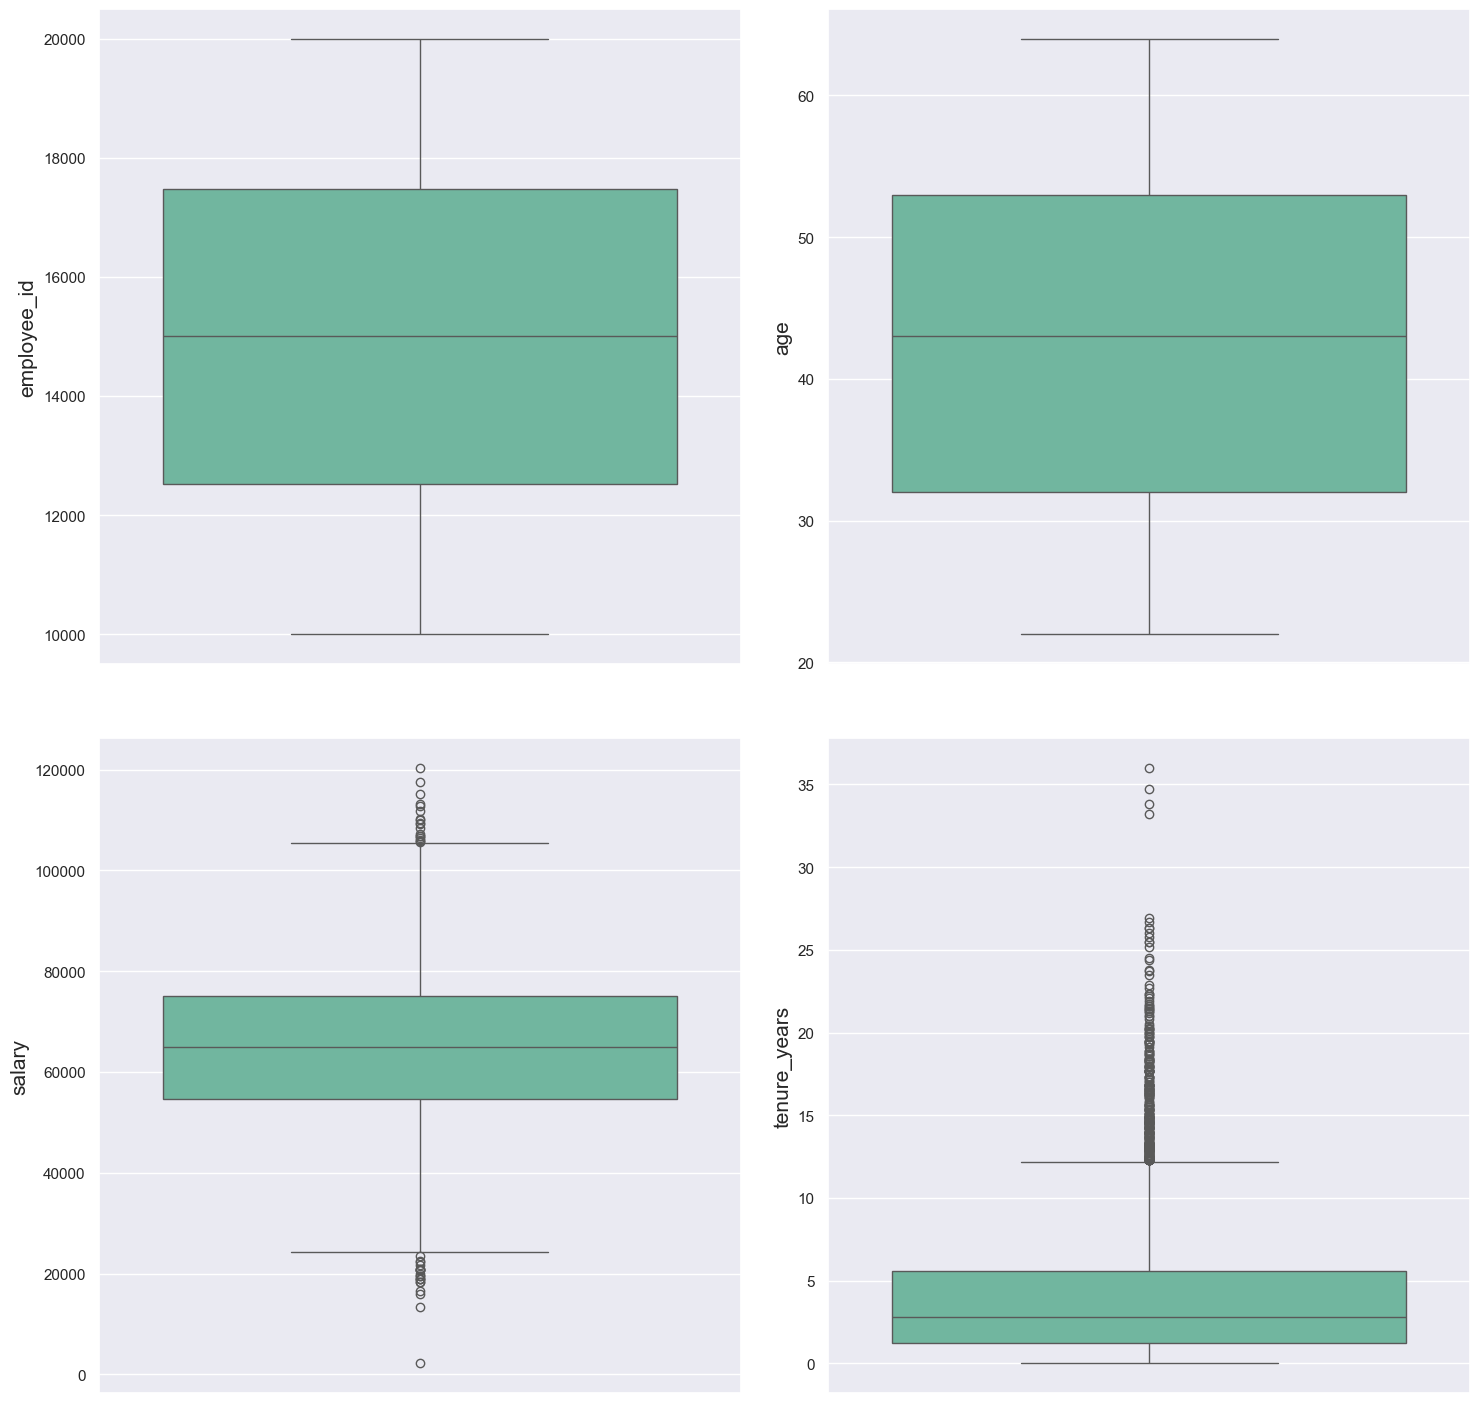

In [42]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

fig, axs = plt.subplots(2,2, figsize=(15,15))
fig.tight_layout(pad=3.0)

for f,ax in zip(numeric_cols,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=train_df,y=train_df[f],palette='BuGn')

### `Observations:`

- The Salary and Tenure years have outliers.

### **Barplot representation of numerical feature**

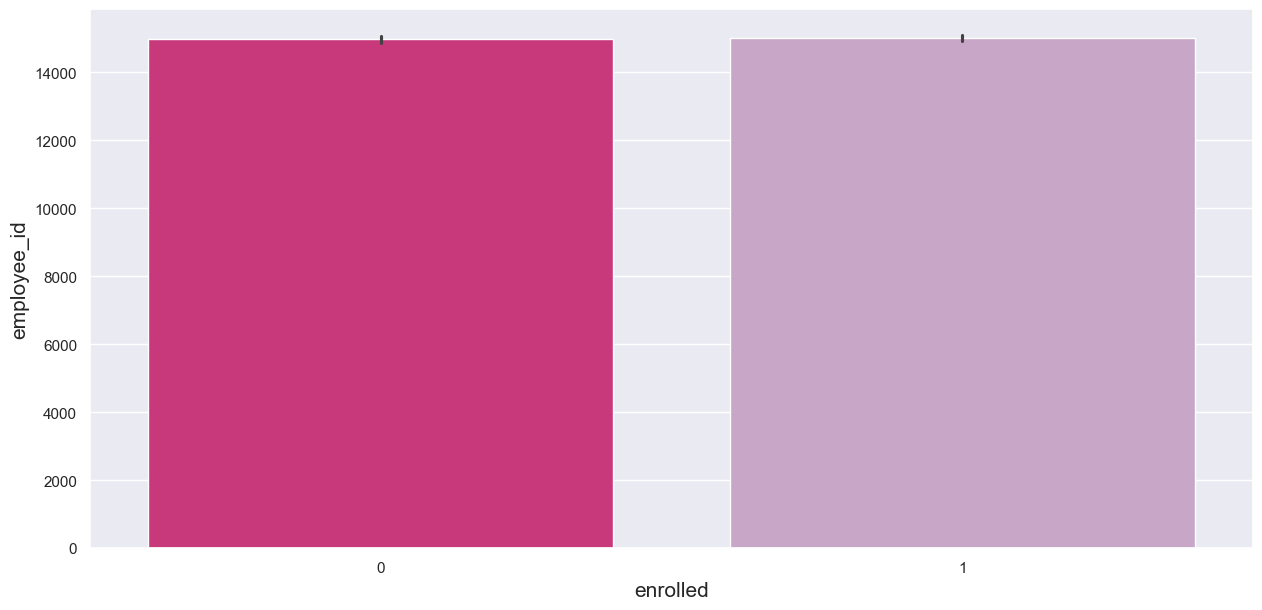

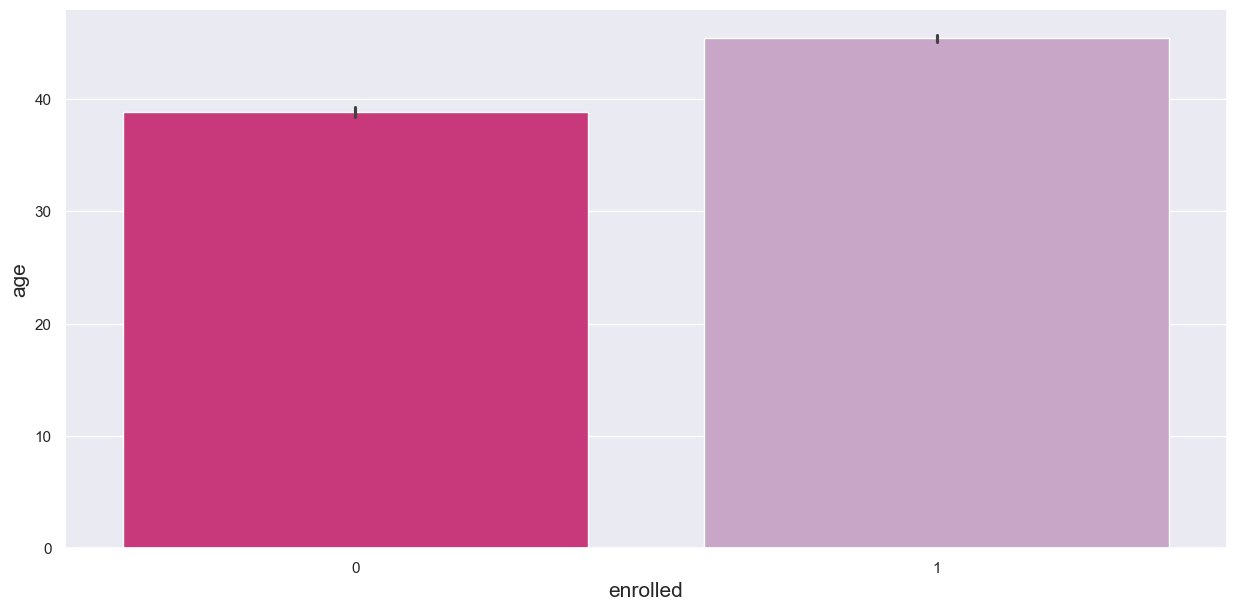

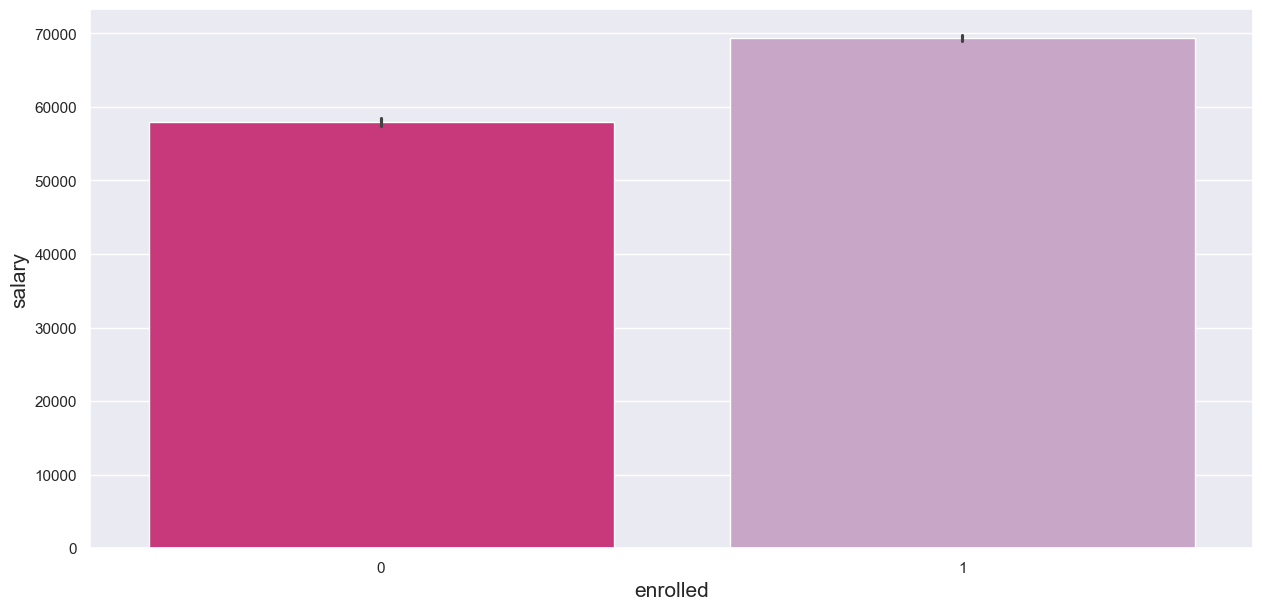

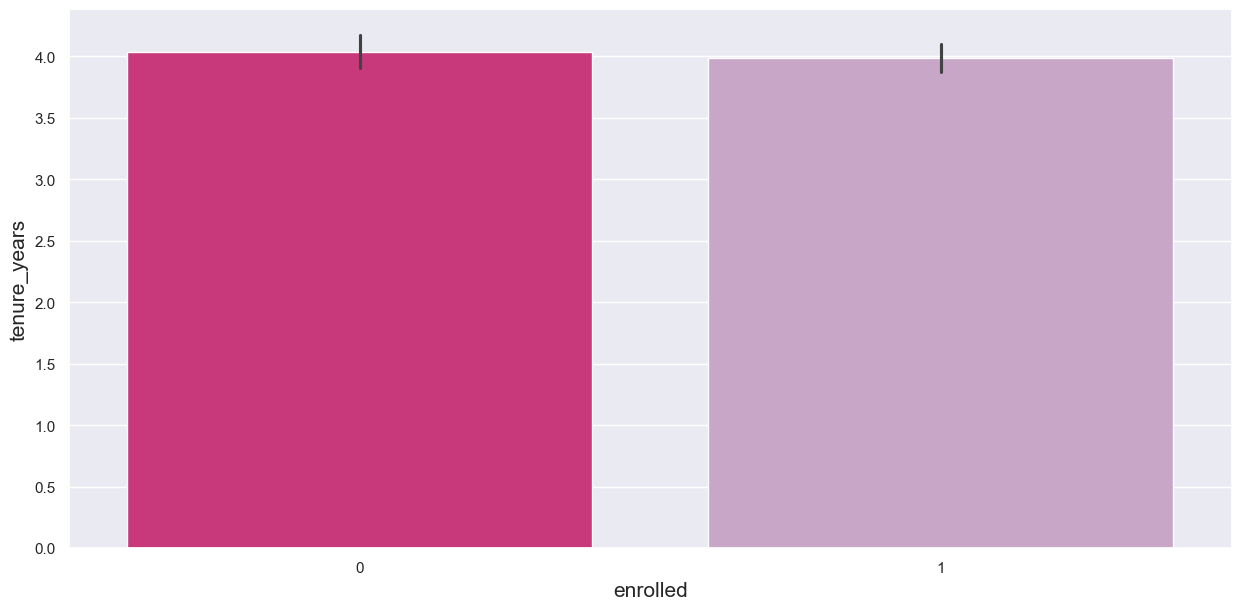

In [46]:
#Plotting the barplot of numerical features
sns.set(rc={'figure.figsize':(15,7),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")
for i in numeric_cols:
    sns.barplot(data=train_df,x='enrolled',y=i,palette='PuRd_r')
    plt.show()

### `Observations:`

- From the above graphs, it is clear that Age and salary play a significant role in insurance enrollment.

## `Exploratory Data Analysis and Visualization on categorical column.`

### **Barplot representation on categorical features**

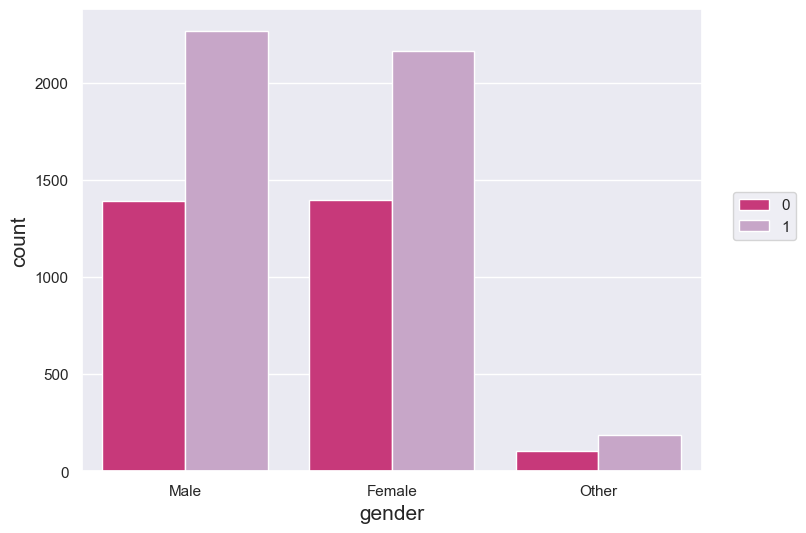

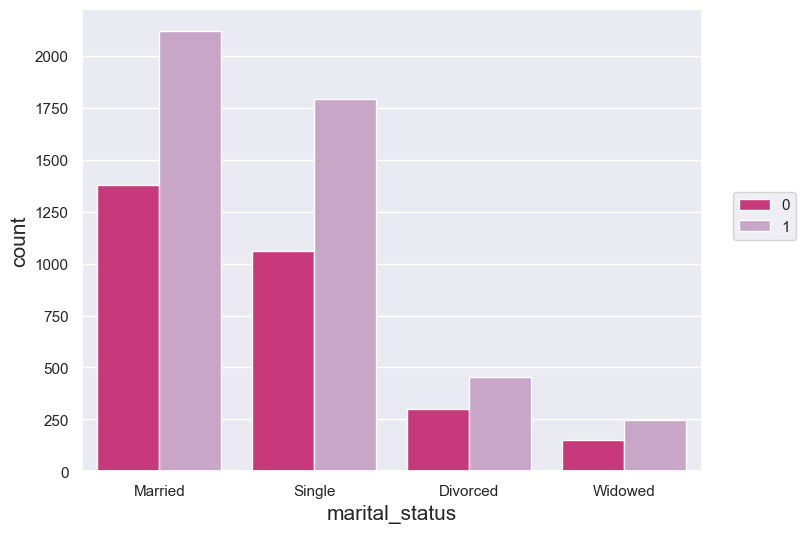

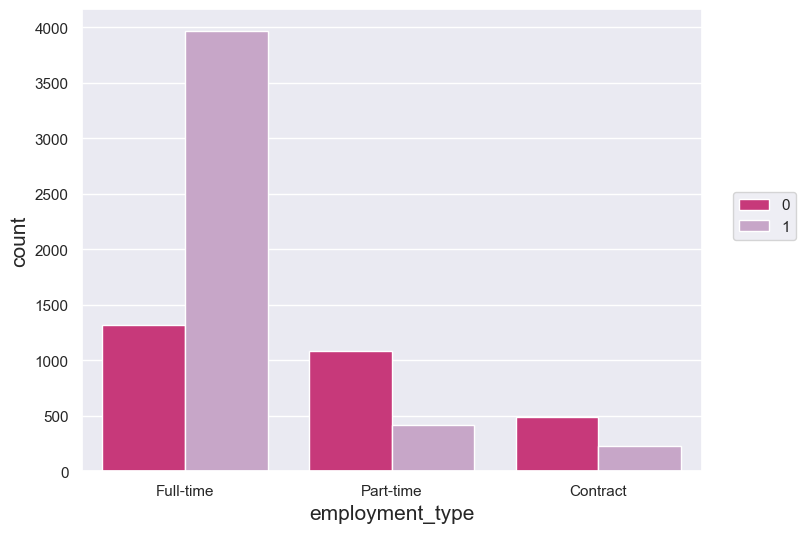

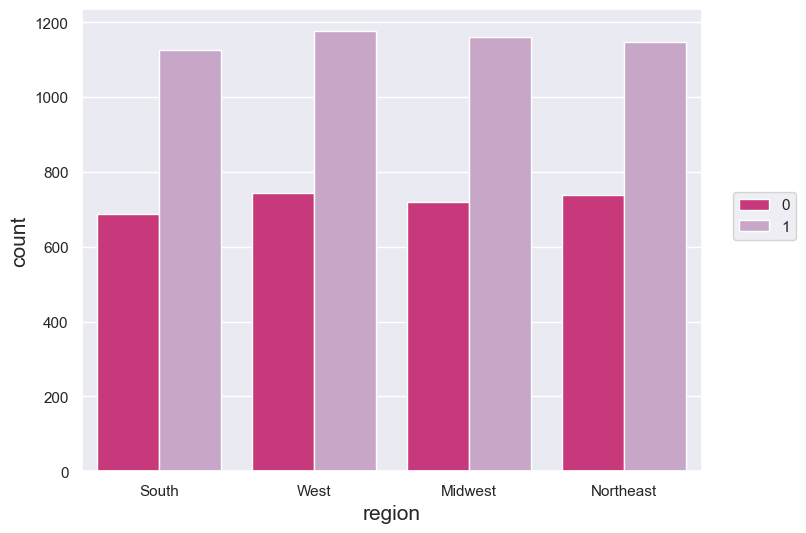

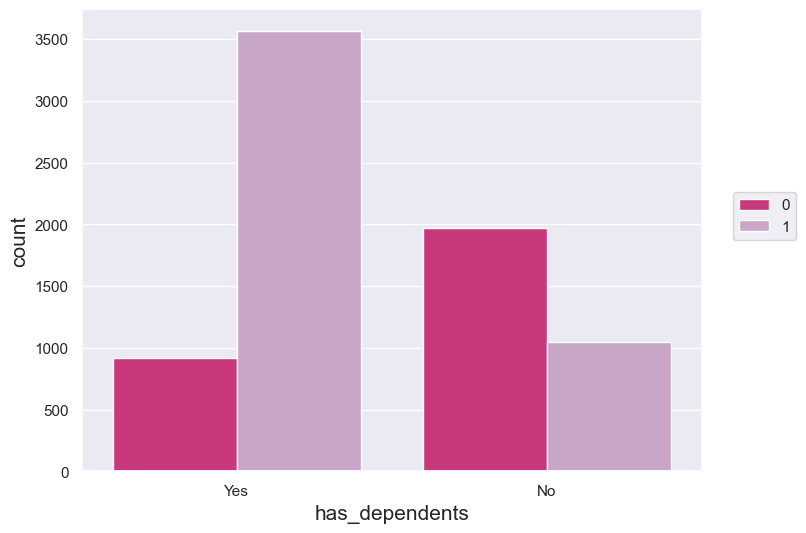

In [50]:
sns.set(rc={'figure.figsize':(20,10),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

for col in categorical_cols:
    plt.figure(figsize=(8,6)) 
    sns.countplot(data=train_df,x=col,hue ='enrolled',palette='PuRd_r')
    plt.legend(loc=(1.05,0.5))

## `Observations:`

- Employee type, marital status and has_dependents have a strong impact on Insurance enrollment.